# Modeling: Boolean operations

This example shows how to use Boolean operations for geometry manipulation.

## Perform required imports

Perform the required imports.

In [1]:
from typing import List

from ansys.geometry.core import launch_docker_modeler
from ansys.geometry.core.designer import Body
from ansys.geometry.core.math import Point2D
from ansys.geometry.core.misc import UNITS
from ansys.geometry.core.plotting import PlotterHelper
from ansys.geometry.core.sketch import Sketch

## Launch local modeler

Launch the local modeler. If you are not familiar with how to launch the local
modeler, see the "Launch a modeling service" section in the
[PyAnsys Geometry 101: Modeling](../01_getting_started/04_modeling.mystnb) example.

In [2]:
modeler = launch_docker_modeler()

## Define bodies

This section defines the bodies to use the Boolean operations on. First you create sketches
of a box and a circle, and then you extrude these sketches to create 3D objects.

### Create sketches

Create sketches of a box and a circle that serve as the basis for your bodies.

In [3]:
# Create a sketch of a box
sketch_box = Sketch().box(Point2D([0, 0], unit=UNITS.m), width=30 * UNITS.m, height=40 * UNITS.m)

# Create a sketch of a circle (overlapping the box slightly)
sketch_circle = Sketch().circle(Point2D([20, 0], unit=UNITS.m), radius=10 * UNITS.m)

### Extrude sketches

After the sketches are created, extrude them to create 3D objects.

In [4]:
# Create a design
design = modeler.create_design("example_design")

# Extrude both sketches to get a prism and a cylinder
prism = design.extrude_sketch("Prism", sketch_box, 50 * UNITS.m)
cylin = design.extrude_sketch("Cylinder", sketch_circle, 50 * UNITS.m)

You must extrude the sketches each time that you perform an example operation.
This is because performing a Boolean operation modifies the underlying
design permanently. Thus, you no longer have two bodies. As shown in the Boolean
operations themselves, whenever you pass in a body, it is consumed, and so it no
longer exists. The remaining body (with the performed Boolean operation) is the one
that performed the call to the method.

## Select bodies

You can optionally select bodies in the plotter as described in the "Select objects
interactively" section in the [PyAnsys Geometry 101: Plotter](../01_getting_started/05_plotter_picker.mystnb)
example. As shown in this example, the plotter preserves the picking order, meaning that the
output list is sorted according to the picking order.

```python
bodies: List[Body] = PlotterHelper(allow_picking=True).plot(design.bodies)
```

Otherwise, you can select bodies from the design directly.

In [5]:
bodies = [design.bodies[0], design.bodies[1]]

## Perform Boolean operations

This section performs Boolean operations on the defined bodies using the PyAnsys Geometry
library. It explores intersection, union, and subtraction operations.

### Perform an intersection operation

To perform an intersection operation on the bodies, first
set up the bodies.

In [6]:
# Create a design
design = modeler.create_design("intersection_design")

# Extrude both sketches to get a prism and a cylinder
prism = design.extrude_sketch("Prism", sketch_box, 50 * UNITS.m)
cylin = design.extrude_sketch("Cylinder", sketch_circle, 50 * UNITS.m)

Perform the intersection and plot the results.

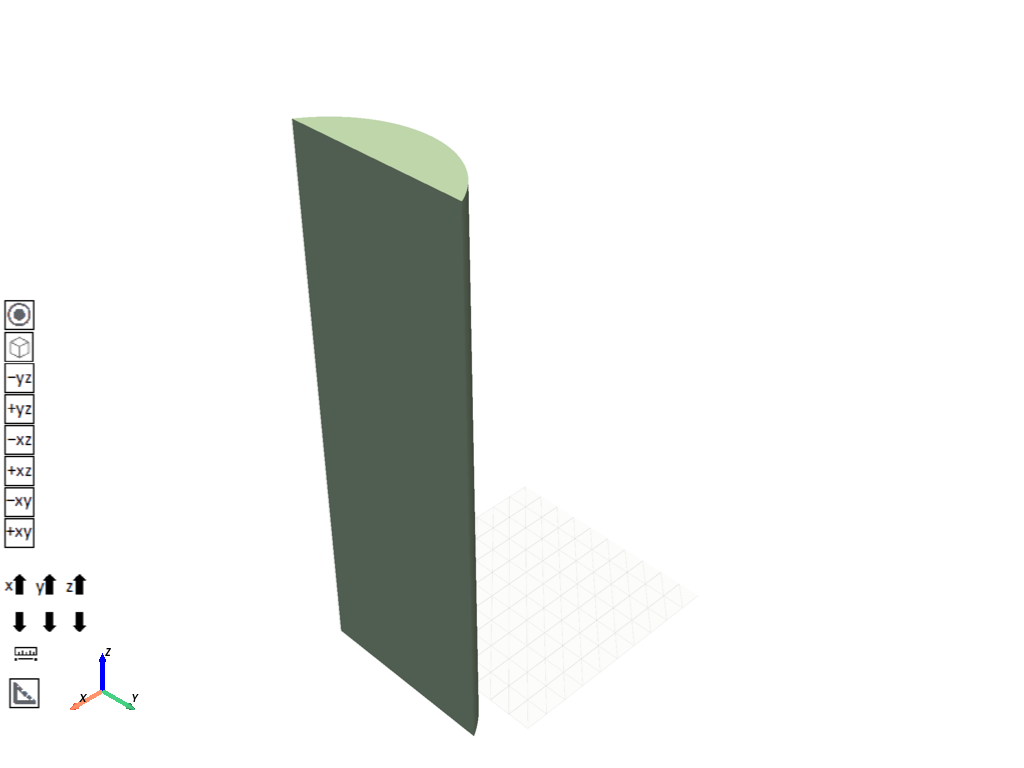

In [7]:
prism.intersect(cylin)
_ = PlotterHelper().plot(design.bodies)

The final remaining body is the ``prism`` body because
the ``cylin`` body has been consumed.

In [8]:
print(design.bodies)

[
ansys.geometry.core.designer.Body 0x1f3641bcc70
  Name                 : Prism
  Exists               : True
  Parent component     : intersection_design
  MasterBody           : 0:22
  Surface body         : False
]


### Perform a union operation

To carry out a union operation on the bodies, first
set up the bodies.

In [9]:
# Create a design
design = modeler.create_design("union_design")

# Extrude both sketches to get a prism and a cylinder
prism = design.extrude_sketch("Prism", sketch_box, 50 * UNITS.m)
cylin = design.extrude_sketch("Cylinder", sketch_circle, 50 * UNITS.m)

Perform the union and plot the results.

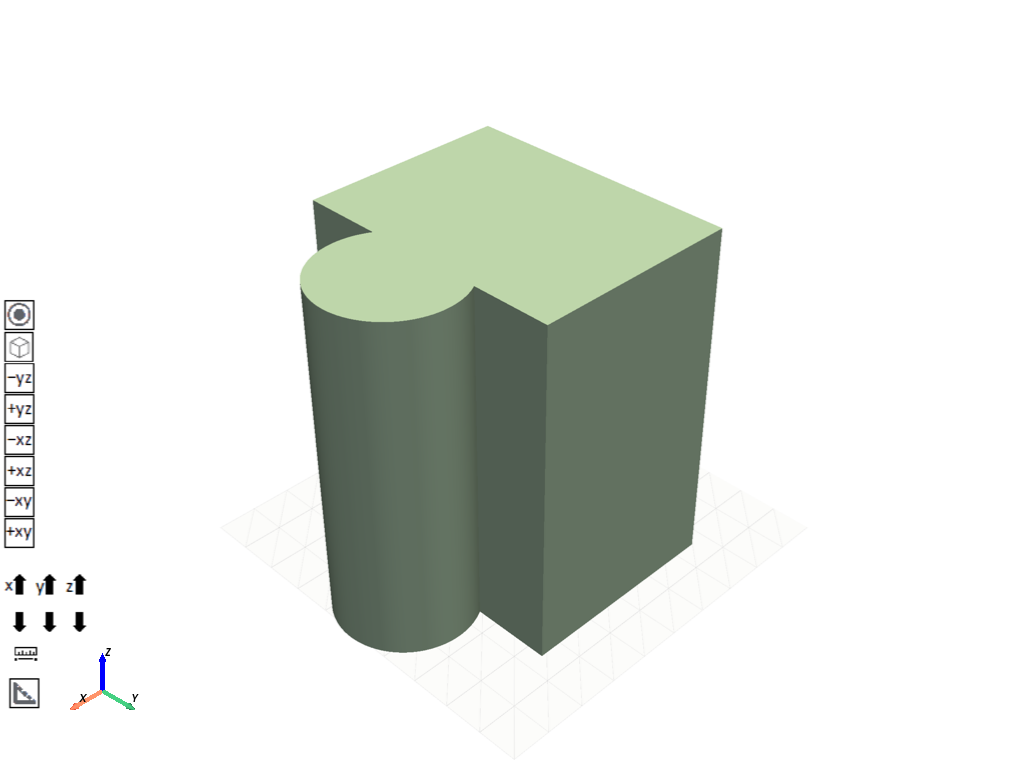

In [10]:
prism.unite(cylin)
_ = PlotterHelper().plot(design.bodies)

The final remaining body is the ``prism`` body because
the ``cylin`` body has been consumed.

In [11]:
print(design.bodies)

[
ansys.geometry.core.designer.Body 0x1f3641bcdc0
  Name                 : Prism
  Exists               : True
  Parent component     : union_design
  MasterBody           : 0:22
  Surface body         : False
]


### Perform a subtraction operation

To perform a subtraction operation on the bodies, first
set up the bodies.

In [12]:
# Create a design
design = modeler.create_design("subtraction_design")

# Extrude both sketches to get a prism and a cylinder
prism = design.extrude_sketch("Prism", sketch_box, 50 * UNITS.m)
cylin = design.extrude_sketch("Cylinder", sketch_circle, 50 * UNITS.m)

Perform the subtraction and plot the results.

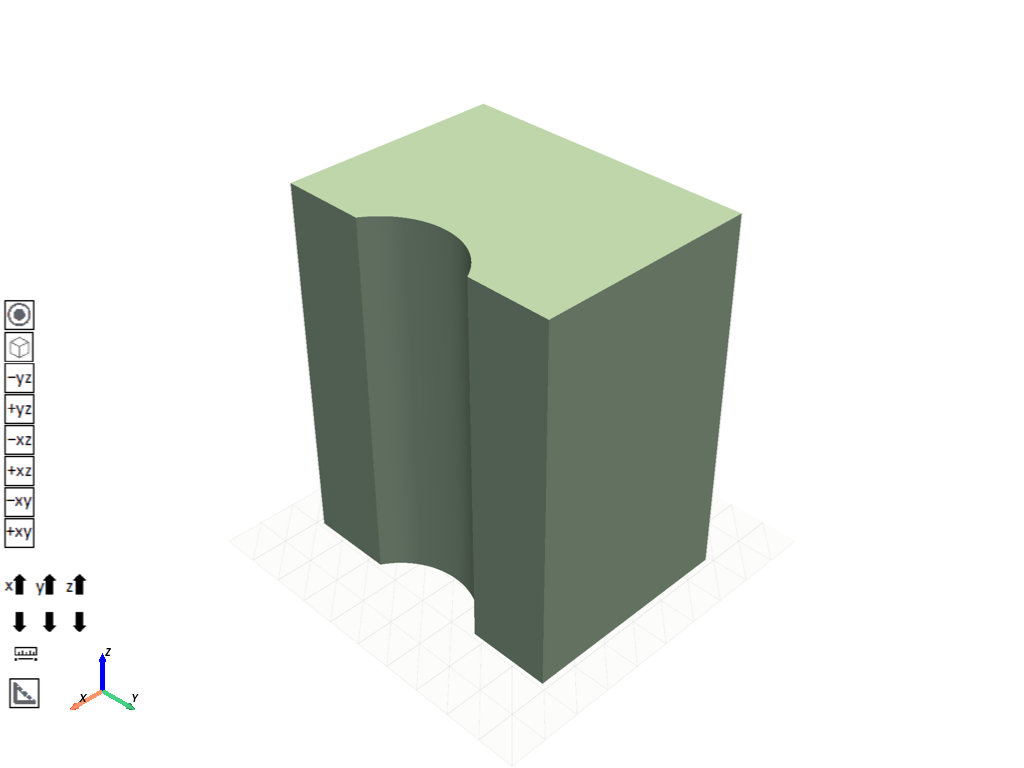

In [13]:
prism.subtract(cylin)
_ = PlotterHelper().plot(design.bodies)

The final remaining body is the ``prism`` body because
the ``cylin`` body has been consumed.

In [14]:
print(design.bodies)

[
ansys.geometry.core.designer.Body 0x1f36a819a60
  Name                 : Prism
  Exists               : True
  Parent component     : subtraction_design
  MasterBody           : 0:22
  Surface body         : False
]


If you perform this action inverting the order of the bodies (that is,
``cylin.subtract(prism)``, you can see the difference in the resulting
shape of the body.

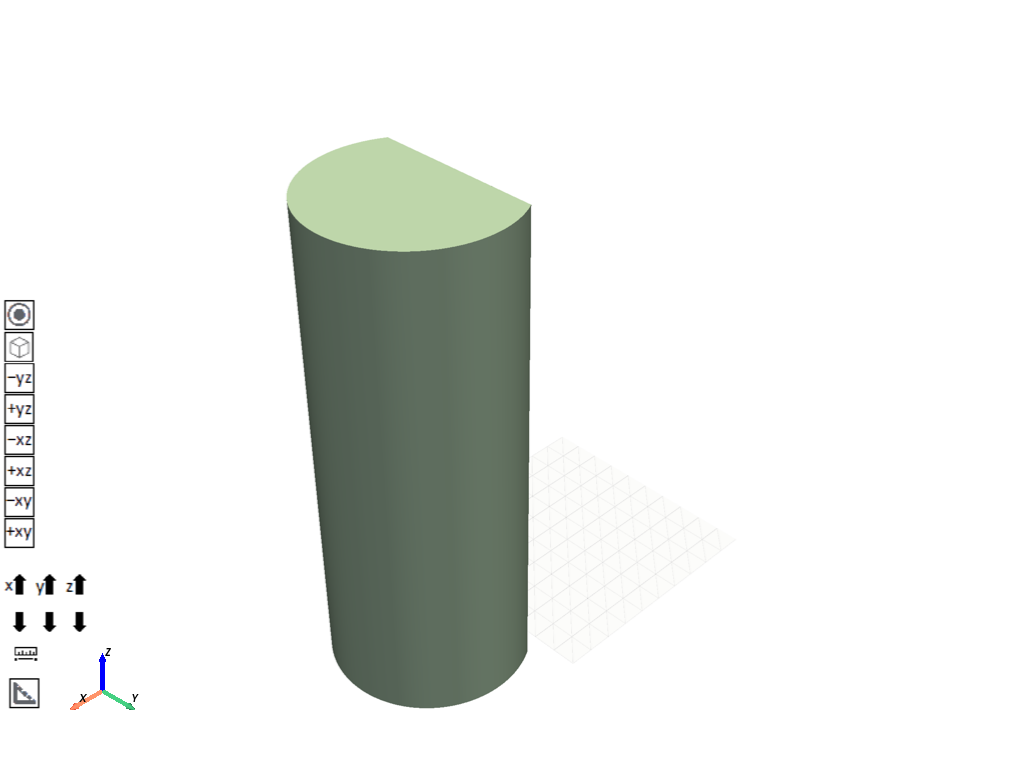

In [15]:
# Create a design
design = modeler.create_design("subtraction_design_inverted")

# Extrude both sketches to get a prism and a cylinder
prism = design.extrude_sketch("Prism", sketch_box, 50 * UNITS.m)
cylin = design.extrude_sketch("Cylinder", sketch_circle, 50 * UNITS.m)

# Invert subtraction
cylin.subtract(prism)
_ = PlotterHelper().plot(design.bodies)

In this case, the final remaining body is the ``cylin`` body because
the ``prism`` body has been consumed.

In [16]:
print(design.bodies)

[
ansys.geometry.core.designer.Body 0x1f36a819ac0
  Name                 : Cylinder
  Exists               : True
  Parent component     : subtraction_design_inverted
  MasterBody           : 0:85
  Surface body         : False
]


## Summary

These Boolean operations provide powerful tools for creating complex geometries
and combining or modifying existing shapes in meaningful ways.

Feel free to experiment with different shapes, sizes, and arrangements to further
enhance your understanding of Boolean operations in PyAnsys Geometry and their applications.